# Distribución Exponencial

La **distribución exponencial** es una distribución continua que modela el tiempo entre eventos que ocurren de manera aleatoria pero a una **tasa constante**. Es muy utilizada en teoría de colas, confiabilidad de sistemas y procesos de Poisson.

## Función de Densidad de Probabilidad (PDF)

La función de densidad para la distribución exponencial está definida como:

$$
f(x; \lambda) =
\begin{cases}
\lambda e^{-\lambda x} & \text{si } x \geq 0 \\
0 & \text{si } x < 0
\end{cases}
$$

donde:
- $ \lambda > 0 $ es la **tasa de eventos por unidad de tiempo**.
- $ x $ es el tiempo entre eventos.

## Propiedades

- **Media**: $ \mu = \frac{1}{\lambda} $
- **Varianza**: $ \sigma^2 = \frac{1}{\lambda^2} $
- **Función de Distribución Acumulada (CDF)**:

  $$
  F(x; \lambda) = 1 - e^{-\lambda x}
  $$

## Ejemplo

Si $ \lambda = 2 $, entonces:
- La media es $ \mu = \frac{1}{2} = 0.5 $
- La varianza es $ \frac{1}{4} = 0.25 $

La distribución describe tiempos entre eventos que ocurren en promedio cada 0.5 unidades de tiempo.


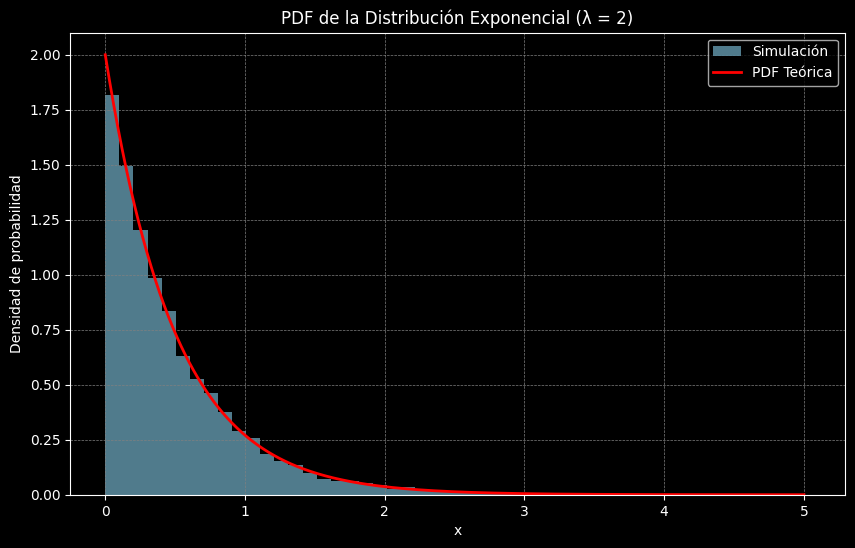

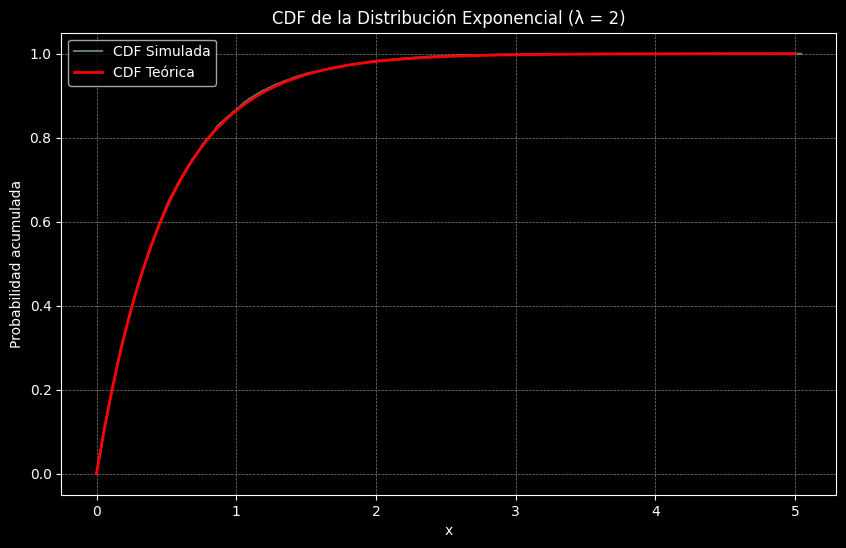

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

# Parámetro de la distribución
lambda_param = 2
n_samples = 10000

# Simular muestras
samples = np.random.exponential(scale=1 / lambda_param, size=n_samples)

# Valores para la curva teórica
x = np.linspace(0, 5, 1000)
pdf_theoretical = lambda_param * np.exp(-lambda_param * x)
cdf_theoretical = 1 - np.exp(-lambda_param * x)

# --------- GRÁFICO PDF ---------
plt.figure(figsize=(10, 6))

plt.hist(samples, bins=50, density=True, alpha=0.6, color='skyblue', label='Simulación')
plt.plot(x, pdf_theoretical, 'r-', lw=2, label='PDF Teórica')

plt.title('PDF de la Distribución Exponencial (λ = 2)')
plt.xlabel('x')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()

# --------- GRÁFICO CDF ---------
plt.figure(figsize=(10, 6))

# CDF simulada
sorted_samples = np.sort(samples)
empirical_cdf = np.arange(1, n_samples + 1) / n_samples
plt.plot(sorted_samples, empirical_cdf, label='CDF Simulada', alpha=0.6)

# CDF teórica
plt.plot(x, cdf_theoretical, 'r-', lw=2, label='CDF Teórica')

plt.title('CDF de la Distribución Exponencial (λ = 2)')
plt.xlabel('x')
plt.ylabel('Probabilidad acumulada')
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()


# Distribución Exponencial — Explicación Intuitiva

La **distribución exponencial** es una distribución de probabilidad continua que modela el **tiempo hasta que ocurre un evento**. Es muy útil cuando los eventos ocurren **al azar**, pero con una **tasa constante** en el tiempo.

## ¿Qué responde esta distribución?

Responde a preguntas como:

> **¿Cuánto tiempo debo esperar hasta que ocurra algo?**

## Ejemplos comunes:

### 1. 📞 Teléfono en una oficina
Si el teléfono suena en promedio 2 veces por minuto ($\lambda = 2$), la distribución exponencial te dice:

> ¿Cuánto tiempo pasará entre una llamada y la siguiente?

### 2. 🚗 Llegada de autos a una estación de servicio
Si llega un auto cada 10 minutos en promedio ($\lambda = \frac{1}{10}$):

> ¿Cuánto tiempo tendré que esperar para que llegue el próximo auto?

---

## Relación con procesos de Poisson

La distribución exponencial describe el **tiempo entre eventos consecutivos** en un **proceso de Poisson**, donde los eventos:
- Ocurren **al azar**.
- Tienen una **tasa constante** $\lambda$ (eventos por unidad de tiempo).

---

## Funciones importantes

### Función de densidad de probabilidad (PDF):

$$
f(x; \lambda) =
\begin{cases}
\lambda e^{-\lambda x} & \text{si } x \geq 0 \\
0 & \text{si } x < 0
\end{cases}
$$

### Función de distribución acumulada (CDF):

$$
F(x; \lambda) = 1 - e^{-\lambda x}
$$

---

## Parámetros y propiedades

- $ \lambda > 0 $: tasa de ocurrencia de eventos (por unidad de tiempo)
- Media: $ \mu = \frac{1}{\lambda} $
- Varianza: $ \sigma^2 = \frac{1}{\lambda^2} $

---

## Ejemplo interpretado

Si $ \lambda = 2 $, entonces:
- El evento ocurre, en promedio, **cada 0.5 unidades de tiempo**.
- La probabilidad de que ocurra antes de $x = 1$ es:

$$
F(1; 2) = 1 - e^{-2 \cdot 1} \approx 0.8647
$$

Es decir, hay **un 86.47% de probabilidad de que el evento haya ocurrido antes de 1 unidad de tiempo**.

---

## Importante

- La PDF **puede tener valores mayores que 1**, especialmente cerca de $x = 0$, pero eso no es problema: lo que importa es que **el área total bajo la curva sea 1**.
- La distribución **no predice cuándo ocurrirá un evento exacto**, sino que **modela probabilísticamente el tiempo de espera**.


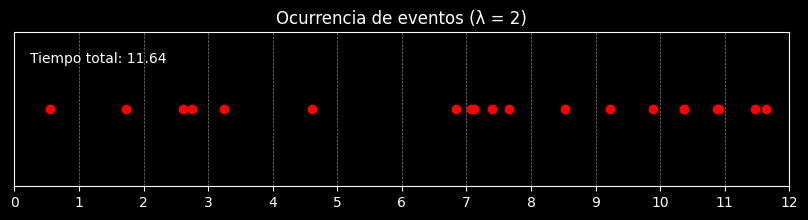

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Parámetro λ
lambda_param = 2
n_events = 20

# Simulación de tiempos entre eventos y acumulados
inter_event_times = np.random.exponential(scale=1 / lambda_param, size=n_events)
event_times = np.cumsum(inter_event_times)

# Configurar gráfico
fig, ax = plt.subplots(figsize=(10, 2))
ax.set_xlim(0, np.ceil(event_times[-1]))
ax.set_xticks(np.arange(0, np.ceil(event_times[-1]) + 1, 1))
ax.set_ylim(0, 1)
ax.set_yticks([])
ax.set_title(f'Ocurrencia de eventos (λ = {lambda_param})')
ax.grid(color='gray', linestyle='--', linewidth=0.5)

event_line, = ax.plot([], [], 'ro', label='Evento')
time_text = ax.text(0.02, 0.8, '', transform=ax.transAxes)

def init():
    event_line.set_data([], [])
    time_text.set_text('')
    return event_line, time_text

def update(frame):
    x = event_times[:frame + 1]
    y = np.ones_like(x) * 0.5
    event_line.set_data(x, y)
    time_text.set_text(f'Tiempo total: {event_times[frame]:.2f}')
    return event_line, time_text

ani = FuncAnimation(fig, update, frames=n_events, init_func=init,
                    blit=True, interval=600, repeat=False)

# Mostrar en Jupyter como HTML5 video
HTML(ani.to_jshtml())
